<a href="https://colab.research.google.com/github/Mtiwari27/DAV_62/blob/main/DAV_Exp2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim : Simple Linear Regression in Python

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

1. Load the data

In [120]:
df = pd.read_csv('/content/Salary_dataset.csv')
df.head(10)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


2. summary of data

In [121]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [123]:
X = df[['YearsExperience']]
y = df['Salary']

In [124]:
model = LinearRegression()

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

LinearRegression()

3. Performed linear regression analysis and visualised using scatter plot

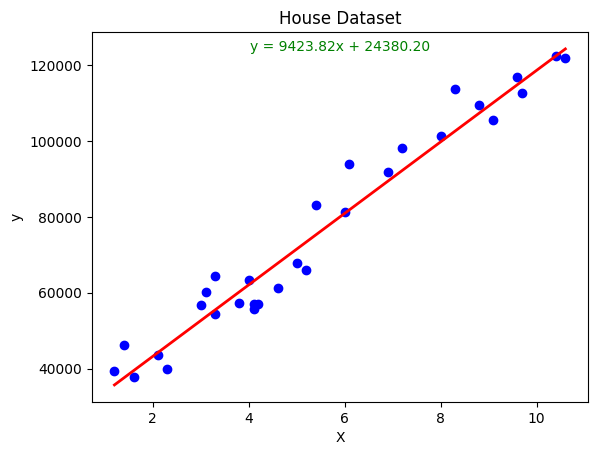

In [126]:
equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
plt.annotate(equation, xy=(0.5, 0.95), xycoords='axes fraction', ha='center', fontsize=10, color='green')
plt.scatter(X, y, color='blue')
plt.title('Salary Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.show()

In [127]:
y_pred = model.predict(X_test)
r_sq = model.score(X,y)
print(f'Coefficient of determination: {r_sq}')

Coefficient of determination: 0.9564379197293564


4. Linearity Check

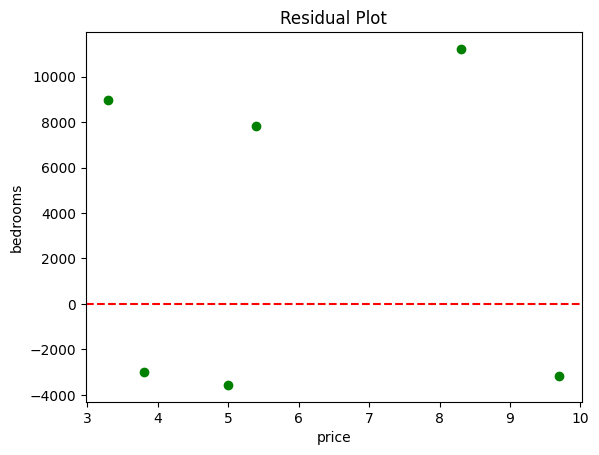

In [128]:
model.fit(X_train, y_train)

residuals = y_test - y_pred

plt.scatter(X_test, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

5. Normality Check

In [130]:
from scipy.stats import probplot, shapiro
# Shapiro-Wilk Test for normality check
stat, p_value = shapiro(df['Salary'])
print(f'Statistic: {stat}, p-value: {p_value}')

# Interpret the p-value
if p_value > 0.05:
    print('The data appears to be normally distributed.')
else:
    print('The data does not appear to be normally distributed.')


Statistic: 0.9103152751922607, p-value: 0.015155415050685406
The data does not appear to be normally distributed.


Conclusion/Outcomes :
1. Understood the concept of Simple Linear Regression
2. Explored the packages in Python and R
3. Performed Simple Linear Regression using the Libraries in Python and R